# Titanic Survival Predictions

This notebook contain a solution to [kaggle titanic survival challenge](https://www.kaggle.com/c/titanic/).

### Contents:
1. Import Libraries
2. Read and Explore Data
3. Data Analysis and Visualization
5. Clean and arrange data
6. Fitting and comparing Models
7. Validating the Model
7. Creating Submission File

## 1) Import Libraries

Import numpy, pandas and plotting libraries (matplotlib and seaborn).

In [1]:
# loading basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Read and Explore Data

Load data from csv and make initial exploration of train and test DataFrames. In order to make the importation the data have to be downloaded from Kaggle ([kaggle titanic data](https://www.kaggle.com/c/titanic/data)) extracted and saved as 'data/titanic_train.csv' and 'data/titanic_test.csv'. 

In [43]:
# load train and test data
train_data = pd.read_csv("data/titanic_train.csv", index_col='PassengerId')
test_data = pd.read_csv("data/titanic_test.csv", index_col='PassengerId')

In [3]:
# see columns names, types and missing values and head of test_data
print(train_data.info())
print("Shape of train and test DataFrames:", train_data.shape, test_data.shape)
train_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
Shape of train and test DataFrames: (891, 11) (418, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# print description of numerical data
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# print number of missing values in train and test dataFrame
print(pd.isnull(train_data).sum())
print(pd.isnull(test_data).sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


Primary analysis:
Test DataFrame have 891 passagers, and Train Datafram have 418 passagers.

From the 11 columns data we have that:
* 6 columns are numerical: Survived, Pclass, Age, SibSp, Parch, Fare.
  * 2 are continous: Age, Fare
  * 4 are discrite: Survived, Pclass, SibSp, Parch
        
* 5 are strings: Name, Sex, Ticket, Cabin, Embarked
  * 2 are categorical strings: Sex, Embarked
  
Also Cabin, Age and Embarked have missing values that have to be handled.

## 3) Data Analysis and Visualization

Make correlation analysis and visual plot of the relation between all features and the target variable.

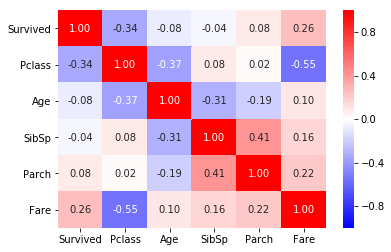

In [44]:
# plot heatmap with numeric features
sns.heatmap(data=train_data.corr(), vmin=-1, vmax=1, cmap='bwr', annot=True, fmt = ".2f")
plt.show()

From the previous graphic we got that Pclass has the higher correlation with Survived, followed by Fare. This gives hypothesis on what to expect from the model results.

### PClass

As expected passangers from higher class (First and Second Class) have higher survival rate.

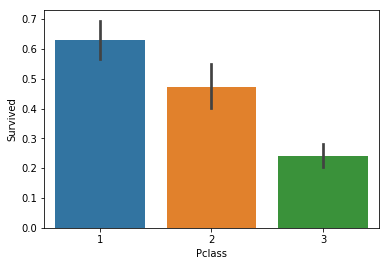

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
# plot barplot
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.show()

# print values
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

## Sex

Female passagers have a higher survivel rate tha male.

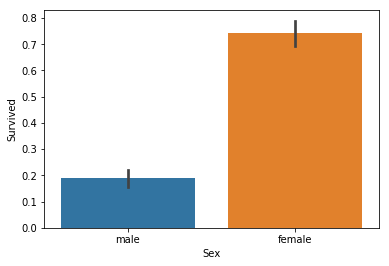

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
# plot barplot
sns.barplot(x="Sex", y="Survived", data=train_data)
plt.show()

# print values
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

## SibSp

Passagers alone or with large families have smaller survival rate.

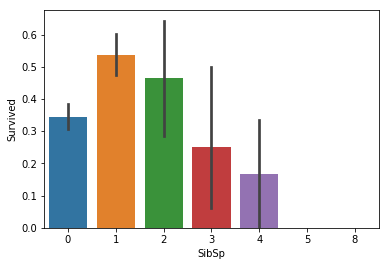

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
# plot barplot
sns.barplot(x="SibSp", y="Survived", data=train_data)
plt.show()

# print values
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

## Parch

Passagers alone or with large families have smaller survival rate.

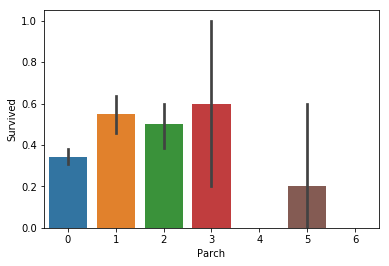

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [10]:
# plot barplot
sns.barplot(x="Parch", y="Survived", data=train_data)
plt.show()

# print values
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

## Embarked

People that embarked in Cherbourg (C) have higher survival probability than people that embarked in Queenstown (Q) and Southampton (S).

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


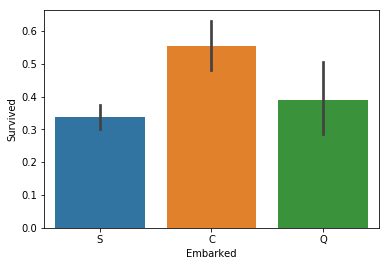

In [11]:
# plot barplot
sns.barplot(x="Embarked", y="Survived", data=train_data)

# print values
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

## Age

Create new column AgeGroup. Babies have higher survival rate and seniors have lower survival rate.

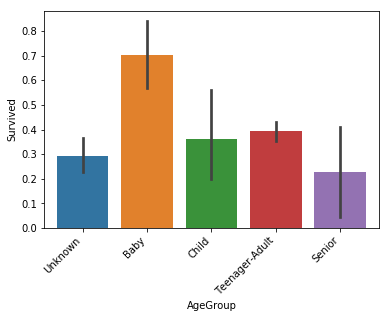

,AgeGroup,Survived
1,Baby,0.704545
3,Teenager-Adult,0.393258
2,Child,0.360000
0,Unknown,0.293785
4,Senior,0.227273


In [12]:
#sort the ages into logical categories
bins = [-1, 0, 5, 12, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager-Adult', 'Senior']
for df in [train_data, test_data]:
    df["Age"] = df["Age"].fillna(-0.5)
    df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.xticks(np.linspace(0,6,7), labels, rotation=45, ha="right")
plt.xlim(-0.6,4.6)
plt.show()

# print values
train_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

## Fare

Create new column FareGroup. People that paid a greater Fare have higher survival probability.

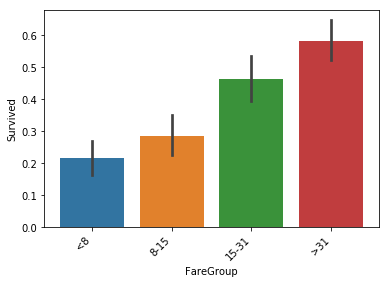

,FareGroup,Survived
3,>31,0.581197
2,15-31,0.462312
1,8-15,0.285714
0,<8,0.215768


In [13]:
#sort the ages into logical categories
bins = [-1, 8, 15, 30, np.inf]
labels = ['<8', '8-15', '15-31', '>31']
for df in [train_data, test_data]:
    df["Fare"] = df["Fare"].fillna(-0.5)
    df['FareGroup'] = pd.cut(df["Fare"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="FareGroup", y="Survived", data=train_data)
plt.xticks(np.linspace(0,5,6), labels, rotation=45, ha="right")
plt.xlim(-0.6,3.6)
plt.show()

# print values
train_data[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

## 4) Clean and arrange data

Create new features, fill missing values, mapp values to int or bool.

Create Title data, base on the Name column, as can be seen, some titles have higher survival rate.

In [14]:
# create Title
for df in [train_data, test_data]:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [15]:
# join SibSp and Parch as FamilySize
for df in [train_data, test_data]:
    df['FamilySize'] = (df['SibSp'] + df['Parch'] + 1)
    df.loc[df['FamilySize'] > 4, 'FamilySize'] = 5

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(
        by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538
4,5,0.161290


In [16]:
# fill missing Embarked with mode
for df in [train_data, test_data]:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
# map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
for df in [train_data, test_data]:
    df['Sex'] = df['Sex'].map(sex_mapping).astype(int)

Here we fill Age missing values based on the title, because they have a high correlation

In [18]:
# map each Age value to a numerical value and fill missing values
age_group_mapping = {'Baby' : 0, 'Child' : 1, 'Teenager-Adult' : 2, 'Senior' : 3}
for df in [train_data, test_data]:
    # Fill missing values based on Title    
    df['AgeGroup'] = df['AgeGroup'].replace(['Unknown'], [None])
    mr_age = df[df["Title"] == "Mr"]["AgeGroup"].mode()[0] 
    miss_age = df[df["Title"] == "Miss"]["AgeGroup"].mode()[0]
    mrs_age = df[df["Title"] == "Mrs"]["AgeGroup"].mode()[0] 
    master_age = df[df["Title"] == "Master"]["AgeGroup"].mode()[0]
    rare_age = df[df["Title"] == "Rare"]["AgeGroup"].mode()[0]
    title_age_mapping = {"Mr": mr_age, "Miss": miss_age, "Mrs": mrs_age, "Master": master_age, "Rare": rare_age}
    df['AgeGroup'].fillna(df['Title'].map(title_age_mapping), inplace=True)
    
    # map strings to int
    df['AgeGroup'] = df['AgeGroup'].map(age_group_mapping).astype('int')

In [19]:
# map each FareGroup value to a numerical value
fare_mapping = {'<8' : 0, '8-15' : 1, '15-31' : 2, '>31' : 3}
for df in [train_data, test_data]:
    df['FareGroup'] = df['FareGroup'].map(fare_mapping).astype('int')

In [20]:
# create CabinBool feature, that show if the passanger have or not a Cabin
for df in [train_data, test_data]:
    df["CabinBool"] = df["Cabin"].notnull().astype('bool')

In [21]:
# drop unused data
for df in [train_data, test_data]:
    df.drop(['Name'], axis = 1, inplace=True)
    df.drop(['SibSp'], axis = 1, inplace=True)
    df.drop(['Parch'], axis = 1, inplace=True)
    df.drop(['Age'], axis = 1, inplace=True)
    df.drop(['Cabin'], axis = 1, inplace=True)
    df.drop(['Fare'], axis = 1, inplace=True)
    df.drop(['Ticket'], axis = 1, inplace=True)

Checking the data in train and test DataFrames.

In [22]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Embarked      891 non-null object
AgeGroup      891 non-null int64
FareGroup     891 non-null int64
Title         891 non-null object
FamilySize    891 non-null int64
CabinBool     891 non-null bool
dtypes: bool(1), int64(6), object(2)
memory usage: 103.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Embarked      418 non-null object
AgeGroup      418 non-null int64
FareGroup     418 non-null int64
Title         418 non-null object
FamilySize    418 non-null int64
CabinBool     418 non-null bool
dtypes: bool(1), int64(5), object(2)
memory usage: 26.5+ KB


In [23]:
print(train_data.describe(), test_data.describe())

         Survived      Pclass         Sex    AgeGroup   FareGroup  FamilySize
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.352413    1.888889    1.478114    1.785634
std      0.486592    0.836071    0.477990    0.506142    1.147701    1.195524
min      0.000000    1.000000    0.000000    0.000000    0.000000    1.000000
25%      0.000000    2.000000    0.000000    2.000000    0.000000    1.000000
50%      0.000000    3.000000    0.000000    2.000000    1.000000    1.000000
75%      1.000000    3.000000    1.000000    2.000000    3.000000    2.000000
max      1.000000    3.000000    1.000000    3.000000    3.000000    5.000000            Pclass         Sex    AgeGroup   FareGroup  FamilySize
count  418.000000  418.000000  418.000000  418.000000  418.000000
mean     2.265550    0.363636    1.928230    1.456938    1.741627
std      0.841838    0.481622    0.420822    1.160630    1.114646
min      1.000000    0.000000    0

## 6) Fitting and comparing Models

Here it is trained 9 models, all optimized and checked with cross validation score. We choose the model with best accuracy. The models trained here are:
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

In [24]:
# prepare data to be used in the models
from sklearn.model_selection import cross_val_score
train_data = pd.get_dummies(train_data, columns=['Embarked', 'Title'], drop_first=True)
y = train_data["Survived"]
X = train_data.drop(['Survived'], axis = 1)

In [25]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
scores = cross_val_score(gaussian, X, y, cv=5)
acc_gaussian = round(scores.mean() * 100, 2)
print(acc_gaussian)

78.68


In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
scores = cross_val_score(logreg, X, y, cv=5)
acc_logreg = round(scores.mean() * 100, 2)
print(acc_logreg)

81.38


In [27]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC(gamma='auto')
scores = cross_val_score(svc, X, y, cv=5)
acc_svc = round(scores.mean() * 100, 2)
print(acc_svc)

83.28


In [28]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(max_iter=3000)
scores = cross_val_score(linear_svc, X, y, cv=5)
acc_linear_svc = round(scores.mean() * 100, 2)
print(acc_linear_svc)

82.05


In [29]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
scores = cross_val_score(perceptron, X, y, cv=5)
acc_perceptron = round(scores.mean() * 100, 2)
print(acc_perceptron)

74.11


In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
scores = cross_val_score(decisiontree, X, y, cv=5)
acc_decisiontree = round(scores.mean() * 100, 2)
print(acc_decisiontree)

81.38


In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(max_depth=4, n_estimators=600)
scores = cross_val_score(randomforest, X, y, cv=5)
acc_randomforest = round(scores.mean() * 100, 2)
print(acc_randomforest)

82.49


In [32]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv=5)
acc_knn = round(scores.mean() * 100, 2)
print(acc_knn)

82.17


In [33]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
scores = cross_val_score(sgd, X, y, cv=5)
acc_sgd = round(scores.mean() * 100, 2)
print(acc_sgd)

76.33


In [34]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(n_estimators=500, learning_rate=0.11)
scores = cross_val_score(gbk, X, y, cv=5)
acc_gbk = round(scores.mean() * 100, 2)
print(acc_gbk)

82.05


In [35]:
# Comparison of Models
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_perceptron, 
              acc_linear_svc, acc_decisiontree, acc_sgd, acc_gbk]})
models = models.sort_values(by='Score', ascending=False)

print(models)

                          Model  Score
0       Support Vector Machines  83.28
3                 Random Forest  82.49
1                           KNN  82.17
6                    Linear SVC  82.05
9  Gradient Boosting Classifier  82.05
2           Logistic Regression  81.38
7                 Decision Tree  81.38
4                   Naive Bayes  78.68
8   Stochastic Gradient Descent  76.33
5                    Perceptron  74.11


As Random Forest was one of the best models (82.8%) it will be utilized in submission file.

Bellow we see the importance of each feature in Random Forest model:

In [36]:
randomforest.fit(X, y)
dfFit = pd.DataFrame(randomforest.feature_importances_, train_data.drop(['Survived'], axis = 1).columns, 
                     columns=['Coefficient']).sort_values('Coefficient') 
dfFit.sort_values(by='Coefficient', ascending=False)

,Coefficient
Title_Mr,0.279448
Sex,0.253769
Pclass,0.107158
CabinBool,0.070556
FamilySize,0.068235
Title_Mrs,0.060408
Title_Miss,0.058637
FareGroup,0.043709
AgeGroup,0.029312
Embarked_S,0.012716


## 7) Validating the Model

Verify quality of the trained model (random forest). Use classification report, confusion matrix, roc curve and precision recall curve.

In [46]:
# print classification report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
randomforest = RandomForestClassifier(max_depth=4, n_estimators=600)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       114
           1       0.83      0.80      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



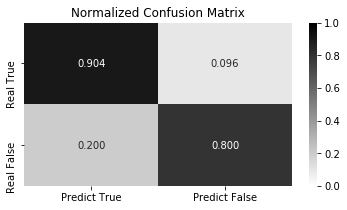

In [47]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cmNorm = [[cm[0,0]/(cm[0,0]+cm[0,1]), cm[0,1]/(cm[0,0]+cm[0,1])],
         [cm[1,0]/(cm[1,0]+cm[1,1]), cm[1,1]/(cm[1,0]+cm[1,1])]]
df_cm = pd.DataFrame(cmNorm, index=['Real True', 'Real False'], columns=['Predict True', 'Predict False'])
plt.figure(figsize = (6,3))
plt.title("Normalized Confusion Matrix")
sns.heatmap(df_cm, annot=True, vmin=0, vmax=1, cmap='binary', fmt = ".3f")
plt.show()

Area Under ROC Curve (AUC): 0.9076923076923077


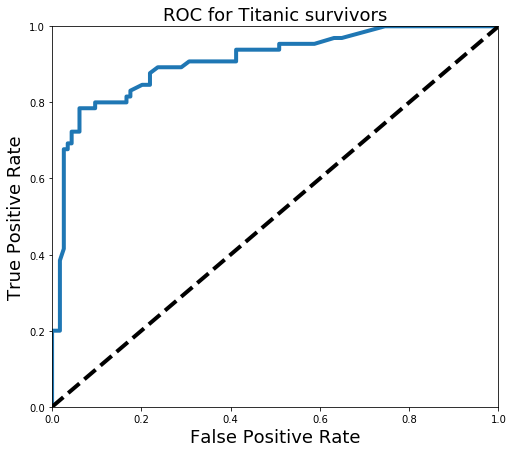

In [51]:
# plot roc_curve and auc
from sklearn.metrics import roc_curve, auc

y_pred_proba = randomforest.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1] 
FPR, TPR, _ = roc_curve(y_test, y_pred_proba)
ROC_AUC = auc(FPR, TPR)
print ("Area Under ROC Curve (AUC):", ROC_AUC)

plt.figure(figsize =[8,7])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

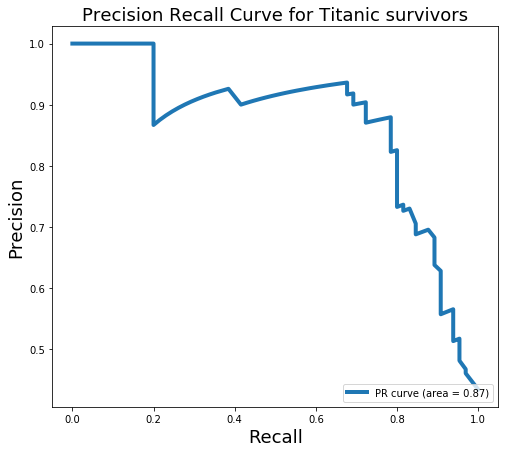

In [52]:
# plot precision_recall_curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[8,7])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## 8) Creating Submission File

Create and save submission file. The file is saved in the data folder with the name 'titanic_submission.csv'

In [41]:
X_test = pd.get_dummies(test_data, columns=['Embarked', 'Title'], drop_first=True)

randomforest = RandomForestClassifier(max_depth=4, n_estimators=600)
randomforest.fit(X, y)
predictions = randomforest.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test.index.values, 'Survived': predictions})
output.to_csv('data/titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
